스케일러

In [2]:
import pandas as pd

In [4]:
df = pd.DataFrame({
    'A' : ['a', 'b', 'c', 'a', 'b'],
    'B' : [1, 2, 3, 1, 0]
})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [7]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [8]:
le .inverse_transform([1, 2, 2, 2])

array(['b', 'c', 'c', 'c'], dtype=object)

2 min-max scaling

In [9]:
df = pd.DataFrame({
    'A' : [10, 20, -10, 0, 25],
    'B' : [1, 2, 3, 1, 0]
})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


2.3 fit~

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

2.4 그러면 이런 요소를 찾게 된다

In [14]:
mms.data_max_, mms.data_min_ # 가장 큰 숫자 작은 숫자 찾는다

(array([25.,  3.]), array([-10.,   0.]))

2.7 한번에는 이렇게~^^

In [15]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

3 Standart Scaler

In [16]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


3.3 이번에도 fit~

In [17]:
from sklearn.preprocessing  import StandardScaler

ss = StandardScaler()
ss.fit(df)


StandardScaler()

3.4 평균과 표준편차

In [18]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

3.5 transform

In [19]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

4.1 Robust Scaler

In [20]:
df = pd.DataFrame({
    'A': [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.1, 5]
})

4.3 방금 배운 것 포함 Robust 스케일러까지

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()


In [25]:
df_scaler = df.copy()

df_scaler['Minmax'] = mm.fit_transform(df)
df_scaler['standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [26]:
df_scaler

,A,Minmax,standard,Robust
0,-0.1,0.000000,-0.662782,-0.600000
1,0.0,0.019608,-0.593015,-0.466667
2,0.1,0.039216,-0.523249,-0.333333
3,0.2,0.058824,-0.453482,-0.200000
4,0.3,0.078431,-0.383716,-0.066667
5,0.4,0.098039,-0.313949,0.066667
6,0.5,0.117647,-0.244183,0.200000
7,1.0,0.215686,0.104650,0.866667
8,1.1,0.235294,0.174416,1.000000
9,5.0,1.000000,2.895310,6.200000


4.6 box_plot으로~

/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

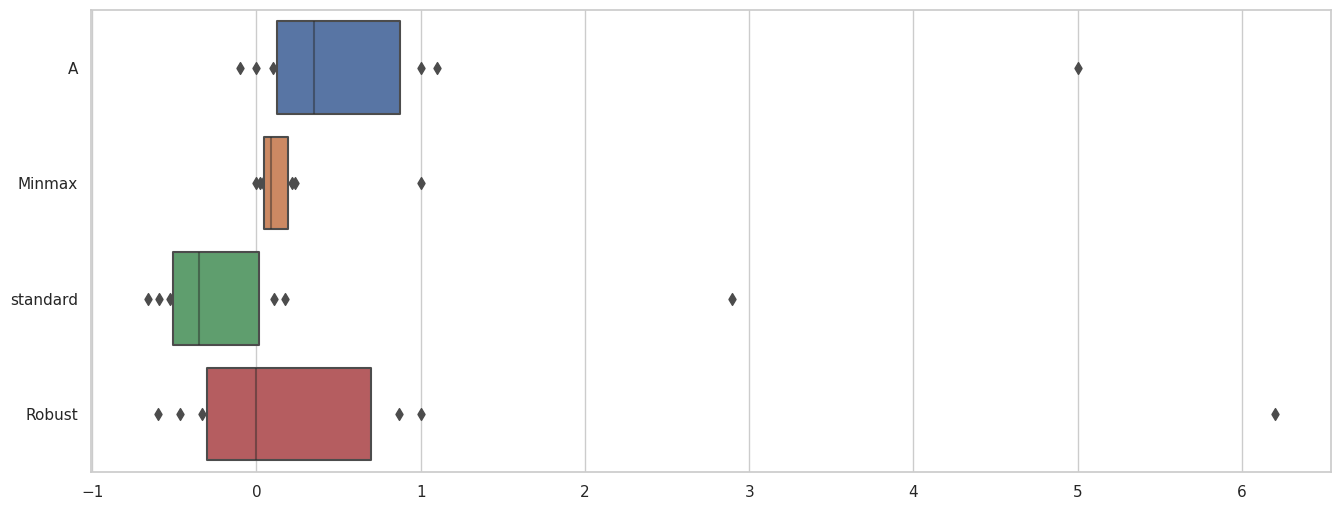

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = "whitegrid")
plt.figure(figsize=(16, 6))
sns.boxenplot(data = df_scaler, orient = "h");

# 모델 평가

1 모델 평가의 개념

1.1 여전히 우리가 만든 모델은 얼마나 좋은 것일까?
모델을 좋다, SOSO, 나쁘다 등으로 평가할 방법은 없다
대부분 다양한 모델, 다양한 파라미터를 두고, 상대적으로 비교한다

1.4 이진 분류 모델의 평가

In [ ]:
TP TruePositive : 실제 p를 p라고 맞춘경우
FN False Negative: 실제 p를 n이라고 틀리게 예측한 경우
TN True Negative: 실제 n를 n이라고 맞춘경우
FP False Positive: 실제 n을 p라고 틀리게 예측한경우

In [ ]:
1.7 Accuracy
전체 데이터 중 맞게 에측한 비율